In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import h5py
import helper_functions as hf

## Dataset Loading, Visualize & Proprocessing

In [2]:
# Loading the data (cat/non-cat)
train_dataset = h5py.File('data/train_catvnoncat.h5', "r")
test_dataset = h5py.File('data/test_catvnoncat.h5', "r")

train_X_orig = train_dataset['train_set_x'][:].reshape(209,-1).T  # (d, m)=(12288, 209);  first (209,64,64,3) to (209,12288) then to (12288, 209)
train_Y = train_dataset['train_set_y'][:].reshape(1,-1)           # (1, m)=(1, 209)

test_X_orig = test_dataset['test_set_x'][:].reshape(50,-1).T  # (12288, 50); dtype=uint8
test_Y = test_dataset['test_set_y'][:].reshape(1,-1)          # (1, 50); dtype=int64

train_X = train_X_orig/255.0    # dtype=float64
test_X = test_X_orig/255.0

In [3]:
print (f"Number of training examples: m_train = {train_X_orig.shape[1]}")
print (f"Number of testing examples: m_test = {test_X_orig.shape[1]}")
print ("Each image is of size: (64, 64, 3) \n")
print (f"train_X shape: {train_X.shape}")
print (f"train_Y shape: {train_Y.shape}")
print (f"test_X shape: {test_X.shape}")
print (f"test_Y shape: {test_Y.shape}")

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Each image is of size: (64, 64, 3) 

train_X shape: (12288, 209)
train_Y shape: (1, 209)
test_X shape: (12288, 50)
test_Y shape: (1, 50)


y = 1, it's a 'cat' picture.


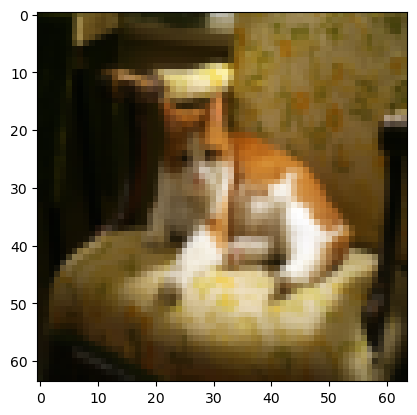

In [4]:
classes = test_dataset["list_classes"][:] # the list of classes
# Visualize sample picture
index = 7
plt.imshow(train_X_orig[:,index].reshape(64,64,3))
print (f"y = {int(train_Y[0, index])}, it's a '{classes[int(train_Y[0, index])].decode('utf-8')}' picture.")

## Theory Hidden Layer Neural Network

### Old
$ \boldsymbol{X} = \begin{bmatrix} \boldsymbol x^1 & \boldsymbol{x}^2 & \dots & \boldsymbol x^m \end{bmatrix}  $ 
$ \qquad where \qquad 
\boldsymbol x^i = \begin{bmatrix} f_1 \\ f_2 \\ f_3 \\ \vdots \\ f_d \end{bmatrix}
\qquad \qquad \qquad$ 
<br>
So &emsp; $\boldsymbol X \rightarrow \color{purple}{\ shape: \ }\color{blue}{(d,m)} $ 
&emsp; where &emsp; $\boldsymbol x^i \rightarrow \color{purple}{\ shape: \ }\color{blue}{(d,1)}$
<br>
<br>
$ \boldsymbol{Y} = \begin{bmatrix} y^1 & y^2 & \dots & y^m \end{bmatrix} 
\qquad \qquad where \qquad 
y^i$ is 0/1
<br>
So &emsp; $\boldsymbol Y \rightarrow \color{purple}{\ shape: \ }\color{blue}{(1,m)}$ 

$$ 
\boldsymbol{W^{[l]}} = 
\begin{bmatrix} \bold {w_1} \\ \bold {w_2}  \\ \vdots \\ \bold {w_{n_l}} \end{bmatrix} =
\begin{bmatrix} ---\boldsymbol{\omega_1}^T--- \\ ---\boldsymbol{\omega_2}^T--- \\ \vdots \\ ---\boldsymbol{\omega_{n_l}}^T--- \end{bmatrix}
,\qquad \boldsymbol{b^{[l]}} = \begin{bmatrix} b_1 \\ b_2 \\ b_3  \\ \vdots  \\ b_{n_l} \end{bmatrix}
$$
$$ \boldsymbol{\omega_{n}} = \begin{bmatrix} w_1 \\ w_2 \\ w_3  \\ \vdots  \\ w_{n_{l-1}} \end{bmatrix}$$
So
<br>
$ \boldsymbol \omega \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_{l-1}, 1)}$
$,\qquad \qquad \bold w \rightarrow \color{purple}{\ shape: \ }\color{blue}{(1, n_{l-1})}$
<br>
$ \boldsymbol{W^{l}} \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_l, n_{l-1})}$
$ ,\qquad \enspace \boldsymbol{b} \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_l,)}$

**Data**
<br>
$
\boldsymbol {X} = \boldsymbol {A^{[0]}} \qquad \qquad \
\color{purple}{shape: \qquad}\color{blue}{(n_0,m)} \color{default}
\\
\boldsymbol {Y}, \ \boldsymbol {\hat{Y}=A^{[L]}} \qquad \quad \ \
\color{purple}{shape: \qquad}\color{blue}{(n_L,m)} \color{default}
\\
\boldsymbol {W^{[l]}} \qquad \qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(n_l,n_{l-1})} \color{default}
\\
\boldsymbol {b^{[l]}} \qquad \qquad \qquad \quad \enspace \
\color{purple}{shape: \qquad}\color{blue}{(n_l,1)} \color{default}
$

$ \boldsymbol{Z^{[l]}} = \boldsymbol{W^{[l]} A^{[l-1]} +b}
\qquad \qquad
\color{purple}{ \ shape: \ } \color{blue}{(n_l,m)=(n_l,n_{l-1})\times(n_{l-1},m)} $
<br>
$ \boldsymbol{Z^{[l]}} = \begin{bmatrix} z^1 & z^2 & \dots & z^m \\
& \boldsymbol{z^{[l]}_{2}} \\ & \boldsymbol{z^{[l]}_{3}} \\ & \vdots \\ & \boldsymbol{z^{[l]}_{n_l}} \end{bmatrix} $

**Algorithm**
<br>
layers_dims=[$n_x,n_{h1},n_{h2},n_{h3},n_y$]
<br>
L=no. of layers including input=len(layers_dims)
<br>
A_prev=X

for $\quad  l=1 \enspace to \enspace L-1:$
<br>
$ \qquad \boldsymbol {Z^{[l]}} = \boldsymbol{W^{[l]}A^{[l-1]}} + \boldsymbol{b^{[l]}} \\
\qquad \boldsymbol {A^{[l]}} = g^{[l]}(\boldsymbol {Z^{[l]}}) \\
\boldsymbol {Z^{[L]}} = \boldsymbol{W^{[L]}A^{[L-1]}} + \boldsymbol{b^{[L]}} \\
\boldsymbol {A^{[L]}} = g^{[L]}(\boldsymbol {Z^{[L]}}) \\
$
cache = ( $A^{[l-1]}, W^{[l]}, b^{[l]}$ ), $Z^{[l]}$

where
<br>
sigmoid $ \rightarrow \displaystyle g^{[l]}=\frac{1}{1+e^{\boldsymbol{-Z^{[l]}}}} \qquad $ 
tanh $ \rightarrow \displaystyle g^{[l]}= \frac{ e^{ \boldsymbol{Z^{[l]}}}-e^{\boldsymbol{-Z^{[l]}}} }{ e^{\boldsymbol{Z^{[l]}}}+e^{\boldsymbol{-Z^{[l]}}} } \qquad $
relu $ \rightarrow max(0,\boldsymbol{Z^{[l]}})$

$
\displaystyle \mathcal{J} = -\frac{1}{m} sum\{\bold Y\ ln(\boldsymbol{A^{[L]}})+(1-\bold Y)\ ln(1-\boldsymbol{A^{[L]}})\} 
\qquad \qquad
\color{purple}{shape: } \ \color{blue}{()}
\qquad \color{green} \text{cost function} 
$

$
\displaystyle \boldsymbol{dA^{[L]}} = - \bigg( \frac{\bold Y}{\boldsymbol{A^{[L]}}} - \frac{1-\bold Y}{1-\boldsymbol{A^{[L]}}} \bigg)
$

$ \boldsymbol{dZ^{[L]}} = \boldsymbol{dA^{[L]}} * g'^{[L]} 
\qquad \qquad \qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_y,m)} \color{default}\\
\displaystyle 
\boldsymbol{dW^{[L]}}  = \frac{1}{m} \boldsymbol{dZ^{[L]}} \ \boldsymbol{A^{[L-1]}}^T 
\qquad \qquad \quad \ \color{purple}{shape: } \ \color{blue}{(n_y,n_h)=(n_y,m) \times (m,n_h)} \\
\displaystyle \color{default}
\boldsymbol{db^{[L]}} = \frac{1}{m} \ sum\{ \boldsymbol{dZ^{[L]}}, \text{axis=1} \} 
\qquad \color{purple}{shape: } \ \color{blue}{(n_y,1)} \color{default} \\
\boldsymbol{dA^{[L-1]}}  = \boldsymbol{W^{[L]}}^T \ \boldsymbol{dZ^{[L]}} $
<br>
for $\quad  p=L-1 \enspace to \enspace 0:$
<br>
$ \qquad \boldsymbol{dZ^{[p]}} = \boldsymbol{dA^{[p]}} * g'^{[p]} 
\qquad \qquad \qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_y,m)} \color{default}\\
\displaystyle 
\qquad \boldsymbol{dW^{[p]}}  = \frac{1}{m} \boldsymbol{dZ^{[p]}} \ \boldsymbol{A^{[p-1]}}^T 
\qquad \qquad \quad \ \color{purple}{shape: } \ \color{blue}{(n_y,n_h)=(n_y,m) \times (m,n_h)} \\
\displaystyle \color{default}
\qquad \boldsymbol{db^{[p]}} = \frac{1}{m} \ sum\{ \boldsymbol{dZ^{[p]}}, \text{axis=1} \} 
\qquad \color{purple}{shape: } \ \color{blue}{(n_y,1)} \color{default} \\
\qquad \boldsymbol{dA^{[p-1]}}  = \boldsymbol{W^{[p]}}^T \ \boldsymbol{dZ^{[p]}} $


where
<br>
sigmoid $ \rightarrow g'(\boldsymbol{Z^{[l]}})=g(1-g) \qquad $ 
tanh $ \rightarrow g'(\boldsymbol{Z^{[l]}})=1-g^2 \qquad $
relu $ \rightarrow \boldsymbol{dZ^{[l]}}=dA^{[l]} \enspace dZ[Z<=0]=0 $

## Theory End

In [5]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_epochs = 3000, activation_L_1="relu", activation_L="sigmoid", print_cost=False):
    grads = {}
    costs = []                         # keep track of cost
    m = X.shape[1]                           # number of examples
    L = len(layers_dims) # number of layers in the network

    # Parameters initialization.
    parameters = {}
    np.random.seed(3)   
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) / np.sqrt(layers_dims[l-1]) #* 0.01
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    
    # Loop (gradient descent)
    for i in range(0, num_epochs):
        
        ## Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        caches = []  # tuple(A_prev,W,b) list for each layer
        A = X
        L = len(parameters) // 2                 # number of layers in the neural network
        for l in range(1, L):                    # The for loop starts at 1 because layer 0 is the input
            A_prev = A 
            A, cache = hf.layer_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = activation_L_1)
            caches.append(cache)  # cache = ((A_prev,W,b), Z)
        AL, cache = hf.layer_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = activation_L)
        caches.append(cache)
        
        m = Y.shape[1]
        ## Compute cost from aL and y.
        cost = -1/m*np.sum(np.multiply(np.log(AL),Y) + np.multiply(np.log(1-AL),1-Y))
        cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
        
        ## Backward propagation.
        dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))    # derivative of cost with respect to AL
        # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
        current_cache = caches[L-1]
        dA_prev_temp, dW_temp, db_temp = hf.layer_backward(dAL, current_cache, activation = activation_L)
        grads["dA" + str(L-1)] = dA_prev_temp
        grads["dW" + str(L)] = dW_temp
        grads["db" + str(L)] = db_temp
        # Loop from l=L-2 to l=0
        for l in reversed(range(L-1)):
            # lth layer: (RELU -> LINEAR) gradients.
            current_cache = caches[l]
            dA_prev_temp, dW_temp, db_temp = hf.layer_backward(grads["dA" + str(l + 1)], current_cache, activation = activation_L_1)
            grads["dA" + str(l)] = dA_prev_temp
            grads["dW" + str(l+1)] = dW_temp
            grads["db" + str(l+1)] = db_temp
        
        # Update parameters.
        for l in range(L):
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)]
                
        # Print the cost every 100 iterations
        if i % 100 == 0 or i == num_epochs - 1:
            costs.append(cost)
            if print_cost:
                print(f"Cost in epoch {i+1}: {cost}")
    
    return parameters, costs

Cost in epoch 1: 0.7611919697657586
Cost in epoch 101: 0.6199481981537579
Cost in epoch 201: 0.5392001645038081
Cost in epoch 301: 0.4473139001245432
Cost in epoch 401: 0.4172643150526187
Cost in epoch 501: 0.3013911810589804
Cost in epoch 601: 0.2308291115770263
Cost in epoch 701: 0.11672373292373213
Cost in epoch 801: 0.06918711404993969
Cost in epoch 901: 0.04828303758939052
Cost in epoch 1001: 0.03608204626412474
Cost in epoch 1101: 0.028715188329680518
Cost in epoch 1201: 0.023875160140024772
Cost in epoch 1301: 0.020404791350179273
Cost in epoch 1401: 0.017606396281225473
Cost in epoch 1501: 0.014764498892712537
Cost in epoch 1601: 0.012434388820125673
Cost in epoch 1701: 0.010553317190490045
Cost in epoch 1801: 0.00862961400389117
Cost in epoch 1901: 0.007127160274113109
Cost in epoch 2000: 0.005917705367073518
Training set:
Accuracy: 0.9999999999999998
Test set:
Accuracy: 0.8


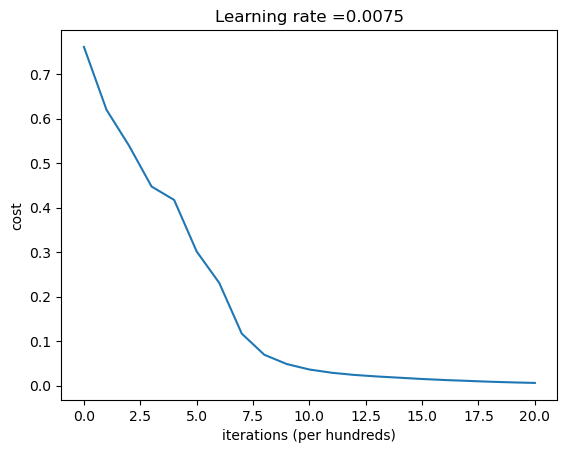

In [7]:
activation_L_1="relu"; activation_L="sigmoid"; learning_rate = 0.0075; layers_dims=[12288, 20, 15, 15, 1]
# [12288,6,1], [12288, 20, 7, 5, 1], [12288, 20, 15, 15, 1]
parameters, costs = L_layer_model(train_X, train_Y, layers_dims, learning_rate = learning_rate, num_epochs = 2000, activation_L_1=activation_L_1, activation_L=activation_L, print_cost=True)
print("Training set:")
hf.predict(train_X, train_Y, parameters,activation_L_1,activation_L)
print(f"Test set:")
test_Y_pred_out = hf.predict(test_X, test_Y, parameters,activation_L_1,activation_L)    
hf.plot_costs(costs, learning_rate)

**Interpretation**:
The cost decreasing shows that the parameters are being learned. However, could train the model even more on the training set. Increasing the number of iterations/epochs result in the training accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

**Comment**: Training accuracy is close to 100%. This is a good sanity check: Test accuracy is 72%. The model is clearly overfitting the training data. It can be reduced by regularization technique and using more layers neural network to capture nonlinear complexity better.

y = 1,  but y_pred = 1 so predicted that it is a 'cat' picture.


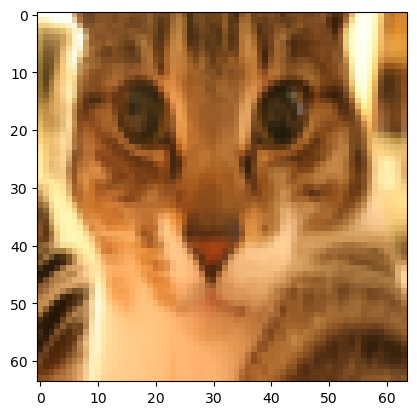

In [7]:
# Example of a picture that is rightly classified.
index = 3
plt.imshow(test_X_orig[:, index].reshape(64,64,3))
print(f"y = {int(test_Y[0,index])},  but y_pred = {test_Y_pred_out[0,index]} so predicted that it is a '{classes[test_Y_pred_out[0,index]].decode('utf-8')}' picture.")

y = 0, but y_pred = 1 so predicted that it is a 'cat' picture.


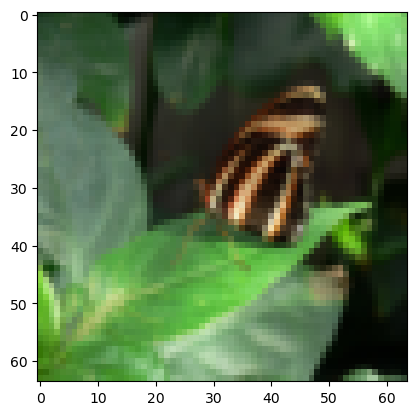

In [8]:
# Example of a picture that was wrongly classified.
index = 5
plt.imshow(test_X_orig[:, index].reshape(64,64,3))
print(f"y = {int(test_Y[0,index])}, but y_pred = {test_Y_pred_out[0,index]} so predicted that it is a '{classes[test_Y_pred_out[0,index]].decode('utf-8')}' picture.")

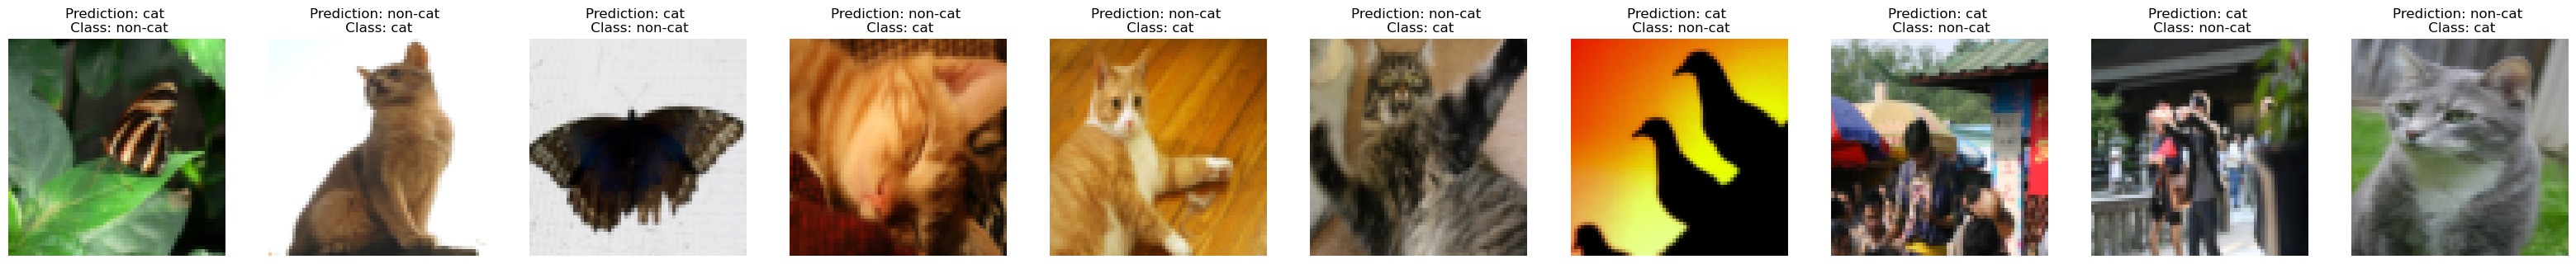

In [9]:
hf.print_mislabeled_images(classes, test_X, test_Y, test_Y_pred_out)

## Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work, must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly change the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of `learning rates`. Run the cell below. 

Training a model with learning rate: 0.005

-------------------------------------------------------

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.05

-------------------------------------------------------

Training a model with learning rate: 0.1

-------------------------------------------------------



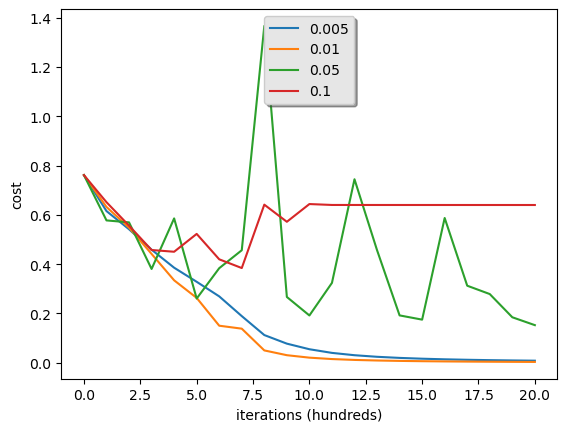

In [10]:
learning_rates = [0.005, 0.01, 0.05, 0.1]
models = {}
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = L_layer_model(train_X, train_Y, layers_dims, num_epochs=2000, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)][1]), label=lr)
plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

Training a model with learning rate: 0.0075

-------------------------------------------------------

Training a model with learning rate: 0.0085

-------------------------------------------------------

Training a model with learning rate: 0.009

-------------------------------------------------------

Training a model with learning rate: 0.01

-------------------------------------------------------



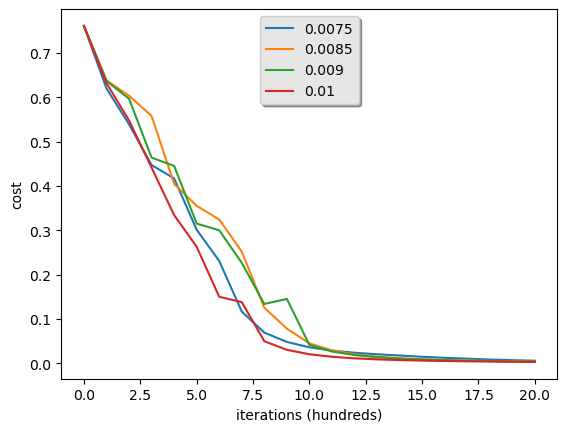

In [11]:
learning_rates = [0.0075, 0.0085, 0.009, 0.01]
models = {}
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = L_layer_model(train_X, train_Y, layers_dims, num_epochs=2000, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)][1]), label=lr)
plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.1), the cost may oscillate up and down. It may even diverge (in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If model overfits, use other techniques to reduce overfitting.


### Test with your own image ##

Use your own image and see the output of your model. To do that:<br>
1. Add image to this Jupyter Notebook's directory, in the "img" folder.<br>
2. Change your image's name in the following code.<br>
3. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!<br>

Accuracy: 1.0
y_pred = 1, neural network predicts a "cat" picture.


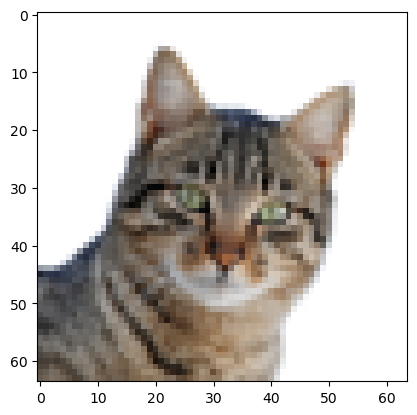

In [12]:
# change this to the name of your image file
my_image = "img/my_image_1.jpg"   
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)

num_px = 64
# We preprocess the image to fit your algorithm.
image = np.array(Image.open(my_image).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

my_image_pred = hf.predict(image, my_label_y, parameters)

print(f"y_pred = {my_image_pred.item()}, neural network predicts a \"" + classes[my_image_pred.item()].decode("utf-8") +  "\" picture.")

Accuracy: 1.0
y_pred = 1, neural network predicts a "cat" picture.


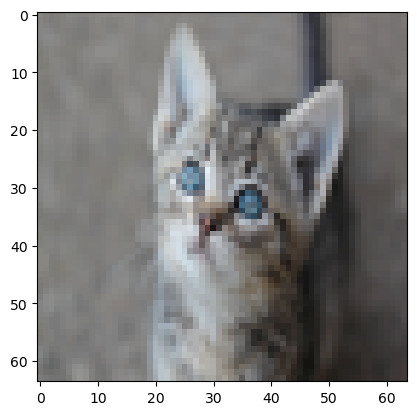

In [13]:
# change this to the name of your image file
my_image = "img/my_image_2.jpg"
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)

# We preprocess the image to fit your algorithm.
image = np.array(Image.open(my_image).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

my_image_pred = hf.predict(image, my_label_y, parameters)

print(f"y_pred = {my_image_pred.item()}, neural network predicts a \"" + classes[my_image_pred.item()].decode("utf-8") +  "\" picture.")